In [14]:
import h5py
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [15]:
# out_deg = h5py.File('out_deg.h5', 'r')
# print([key for key in out_deg.keys()])
# infec_frac = h5py.File('infec_frac.h5', 'r')
# print([key for key in infec_frac.keys()])

In [16]:
# def obtain_sampling_average(key_half) :
#     sampling = []
#     for j in range(70,171) :
# #         key = 'sim_'+str(j)+'_p_rew_0_start_1_dq_1'
#         key = 'sim_'+str(j)+key_half
# #         print(key)
#         df_out_deg = pd.read_hdf('out_deg.h5',key)
#         # df.shape[0] #this is the number of rows
#         bins_number = 101
#         count_out_deg = np.zeros((bins_number,df_out_deg.shape[1]))
#         for i in range(df_out_deg.shape[1]) :
#             count, division_out_deg = np.histogram(df_out_deg.loc[:,i], bins = bins_number,range =(0,101))
#             count_out_deg[:,i] = count
#         sampling.append(count_out_deg)

#     sampling_average = np.ones(shape=np.shape(count_out_deg))
#     for i in range(2000) :
#         sampling_average[:,i] = np.mean([item[:,i] for item in sampling],axis=0)
        
#     return sampling_average
    
# # x = np.arange(0,100,0.05)
# # y = np.arange(0,101,1)
# # X,Y = np.meshgrid(x,y)
# # plt.scatter(X,Y,c = sampling_average,vmin=0,vmax=101)
# # plt.colorbar()
# # plt.show()

In [17]:
def obtain_deg_sampling_average(key_half,file) :
    sampling = []
    for j in range(70,171) :
#         key = 'sim_'+str(j)+'_p_rew_0_start_1_dq_1'
        key = 'sim_'+str(j)+key_half
#         print(key)
        df = pd.read_hdf(file,key)
        # df.shape[0] #this is the number of rows
        bins_number = 101
        count_deg = np.zeros((bins_number,df.shape[1]))
        for i in range(df.shape[1]) :
            count, division_deg = np.histogram(df.loc[:,i], bins = bins_number,range =(0,101))
            count_deg[:,i] = count
        sampling.append(count_deg)

    sampling_average = np.ones(shape=np.shape(count_deg))
    for i in range(df.shape[1]) :
        sampling_average[:,i] = np.mean([item[:,i] for item in sampling],axis=0)
        
    return sampling_average
    

## Count out degree :
### Row numbers are out degree values.  Columns are time steps. Each element is the count 

0
1
2
3
4
5
6
7
8
9
10
11


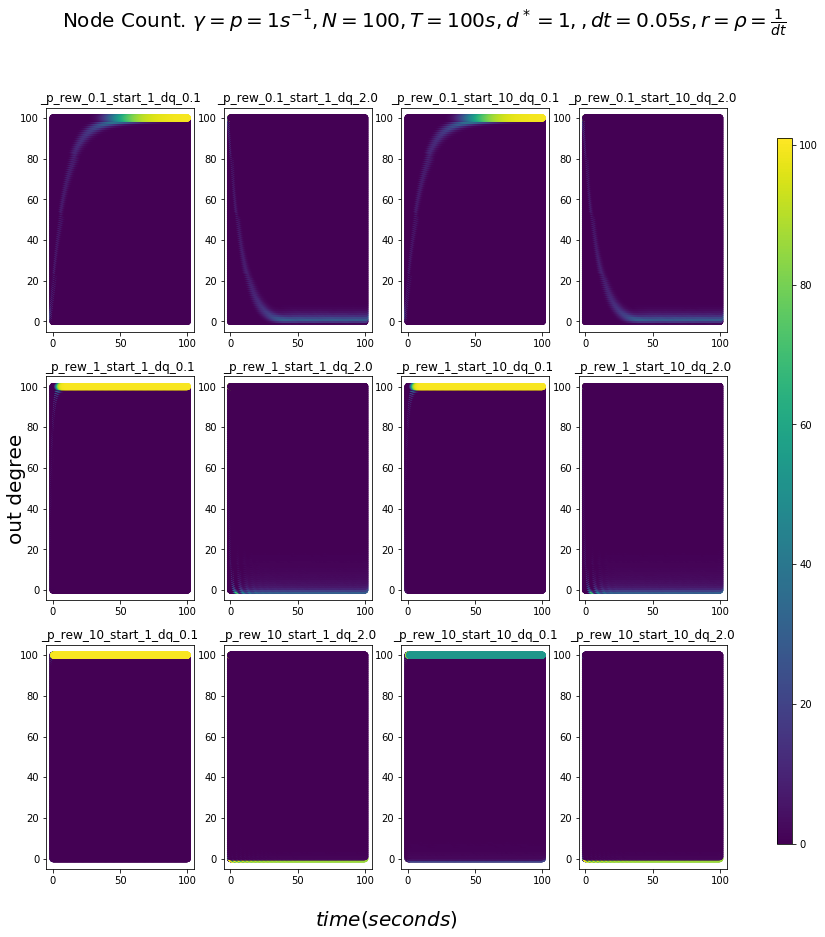

In [18]:
sampling_average_list_out = []
file = 'out_deg.h5'

x = np.arange(0,100,0.05)
y = np.arange(0,101,1)
X,Y = np.meshgrid(x,y)

p_rew_vals = [0,1,10]
start_vals = [1,10]
dose_quantity_vals = [1,20]

counter = 0
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(14,14))
a = 0
m = 0 #for the title
for row in ax:
    b = 0
    d = 0
    n = 0 #for the title
    for col in row:
        print(counter)
        if d == 2 :
            b = b + 1
            d = 0
        key_half = '_p_rew_'+str(p_rew_vals[a])+'_start_'+str(start_vals[b])+'_dq_'+str(dose_quantity_vals[d])
        key_half_title = '_p_rew_'+str(p_rew_vals[a])+'_start_'+str(start_vals[b])+'_dq_'+str(dose_quantity_vals[d]/10)
        if a == 0 :
            key_half_title = '_p_rew_0.1'+'_start_'+str(start_vals[b])+'_dq_'+str(dose_quantity_vals[d]/10)
        d = d + 1
        ax[m, n].set_title(key_half_title)
        sampling_average = obtain_deg_sampling_average(key_half,file)
        sampling_average_list_out.append(sampling_average)
#         im = col.scatter(X,Y,c= sampling_average_list[counter],vmin=0, vmax=101)
        im = col.scatter(X,Y,c= sampling_average,vmin=0, vmax=101)
        counter = counter + 1
        n = n + 1
    a = a + 1
    m = m + 1

nax = fig.add_subplot(111, frame_on = False)
nax.set_xticks([])
nax.set_yticks([])
fig.suptitle(r'Node Count. $\gamma=p=1s^{-1},N=100,T=100s,d^*=1,,dt=0.05s,r=\rho=\frac{1}{dt}$',fontsize = 20)
nax.set_xlabel(r'$time(seconds)$', fontsize = 20, labelpad=40)
nax.set_ylabel(r'out degree', fontsize = 20, labelpad=20)
fig.subplots_adjust(right=0.8)

cbar_ax = fig.add_axes([0.85, 0.15, 0.015, 0.7])
fig.colorbar(im, cax=cbar_ax)

plt.savefig("out_deg.png", format="png")

## Count in degree :
### Row numbers are in degree values.  Columns are time steps. Each element is the count 

0
1
2
3
4
5
6
7
8
9
10
11


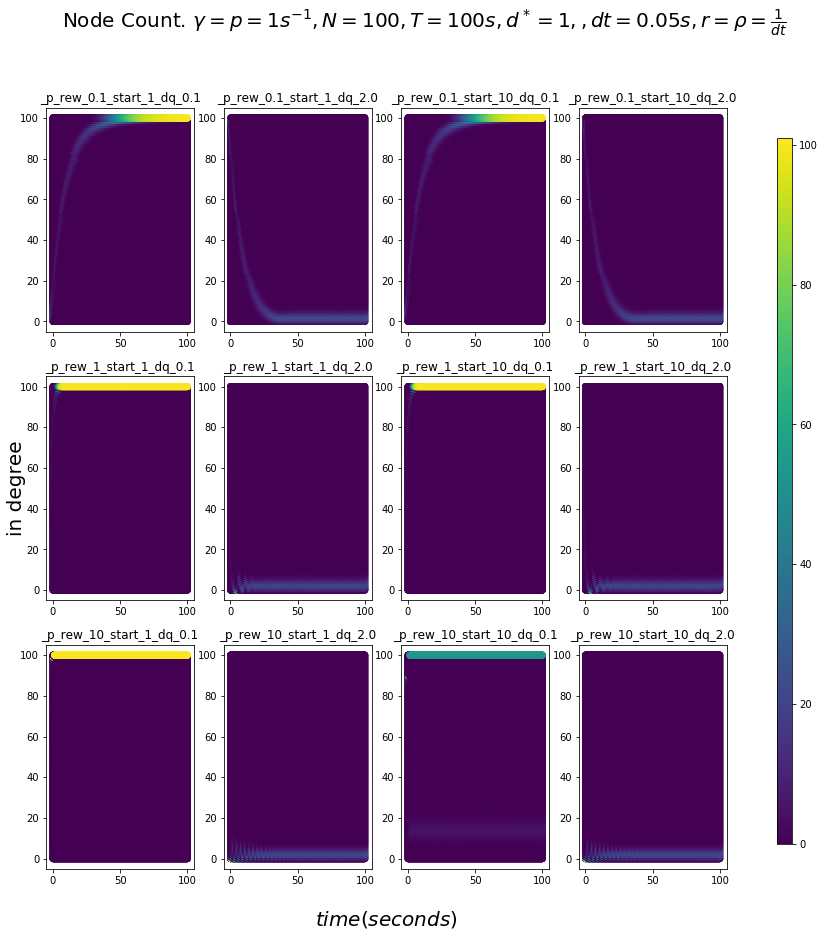

In [19]:
sampling_average_list_in = []
file = 'in_deg.h5'

x = np.arange(0,100,0.05)
y = np.arange(0,101,1)
X,Y = np.meshgrid(x,y)

p_rew_vals = [0,1,10]
start_vals = [1,10]
dose_quantity_vals = [1,20]

counter = 0
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(14,14))
a = 0
m = 0 #for the title
for row in ax:
    b = 0
    d = 0
    n = 0 #for the title
    for col in row:
        print(counter)
        if d == 2 :
            b = b + 1
            d = 0
        key_half = '_p_rew_'+str(p_rew_vals[a])+'_start_'+str(start_vals[b])+'_dq_'+str(dose_quantity_vals[d])
        key_half_title = '_p_rew_'+str(p_rew_vals[a])+'_start_'+str(start_vals[b])+'_dq_'+str(dose_quantity_vals[d]/10)
        if a == 0 :
            key_half_title = '_p_rew_0.1'+'_start_'+str(start_vals[b])+'_dq_'+str(dose_quantity_vals[d]/10)
        d = d + 1
        ax[m, n].set_title(key_half_title)
        sampling_average = obtain_deg_sampling_average(key_half,file)
        sampling_average_list_in.append(sampling_average)
#         im = col.scatter(X,Y,c= sampling_average_list[counter],vmin=0, vmax=101)
        im = col.scatter(X,Y,c= sampling_average,vmin=0, vmax=101)
        counter = counter + 1
        n = n + 1
    a = a + 1
    m = m + 1

nax = fig.add_subplot(111, frame_on = False)
nax.set_xticks([])
nax.set_yticks([])
fig.suptitle(r'Node Count. $\gamma=p=1s^{-1},N=100,T=100s,d^*=1,,dt=0.05s,r=\rho=\frac{1}{dt}$',fontsize = 20)
nax.set_xlabel(r'$time(seconds)$', fontsize = 20, labelpad=40)
nax.set_ylabel(r'in degree', fontsize = 20, labelpad=20)
fig.subplots_adjust(right=0.8)

cbar_ax = fig.add_axes([0.85, 0.15, 0.015, 0.7])
fig.colorbar(im, cax=cbar_ax)

plt.savefig("in_deg.png", format="png")

## Infected Fraction

In [20]:
def obtain_infec_sampling_average(key_half,file) :
    sampling = []
    for j in range(70,171) :
#         key = 'sim_'+str(j)+'_p_rew_0_start_1_dq_1'
        key = 'sim_'+str(j)+key_half
#         print(key)
        df = pd.read_hdf(file,key)
        # df.shape[0] #this is the number of rows
        count_deg = df.values
        sampling.append(count_deg)

    sampling_average = np.ones(shape=np.shape(count_deg))
    for i in range(df.shape[1]) :
        sampling_average[:,i] = np.mean([item[:,i] for item in sampling],axis=0)
        
    return sampling_average

0
1
2
3
4
5
6
7
8
9
10
11


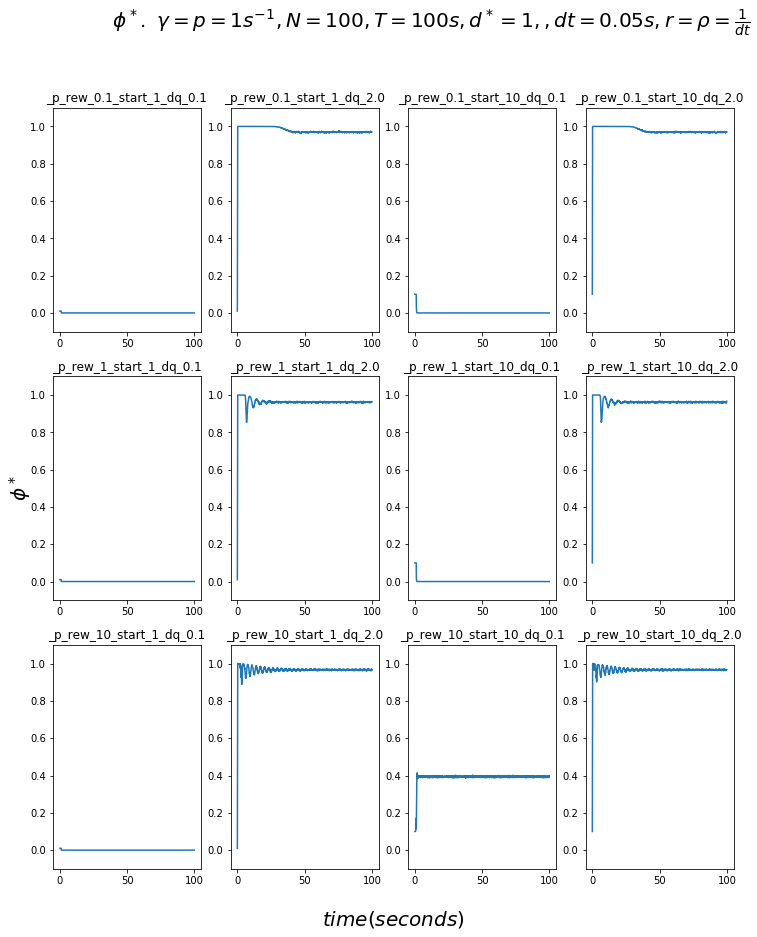

In [21]:
sampling_average_list_infected = []
file = 'infec_frac.h5'

x = np.arange(0,100,0.05)
y = np.arange(0,101,1)
X,Y = np.meshgrid(x,y)

p_rew_vals = [0,1,10]
start_vals = [1,10]
dose_quantity_vals = [1,20]

counter = 0
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(14,14))
a = 0
m = 0 #for the title
for row in ax:
    b = 0
    d = 0
    n = 0 #for the title
    for col in row:
        print(counter)
        if d == 2 :
            b = b + 1
            d = 0
        key_half = '_p_rew_'+str(p_rew_vals[a])+'_start_'+str(start_vals[b])+'_dq_'+str(dose_quantity_vals[d])
        key_half_title = '_p_rew_'+str(p_rew_vals[a])+'_start_'+str(start_vals[b])+'_dq_'+str(dose_quantity_vals[d]/10)
        if a == 0 :
            key_half_title = '_p_rew_0.1'+'_start_'+str(start_vals[b])+'_dq_'+str(dose_quantity_vals[d]/10)
        d = d + 1
        ax[m, n].set_title(key_half_title)
        ax[m, n].set_ylim([-0.1,1.1])
        sampling_average = obtain_infec_sampling_average(key_half,file)
        sampling_average_list_infected.append(sampling_average)
#         im = col.scatter(X,Y,c= sampling_average_list[counter],vmin=0, vmax=101)
        im = col.plot(x.flatten(),sampling_average.flatten(),linestyle = '-')
        counter = counter + 1
        n = n + 1
    a = a + 1
    m = m + 1

nax = fig.add_subplot(111, frame_on = False)
nax.set_xticks([])
nax.set_yticks([])
fig.suptitle(r'$\phi^*.$ $\gamma=p=1s^{-1},N=100,T=100s,d^*=1,,dt=0.05s,r=\rho=\frac{1}{dt}$',fontsize = 20)
nax.set_xlabel(r'$time(seconds)$', fontsize = 20, labelpad=40)
nax.set_ylabel(r'$\phi^*$', fontsize = 20, labelpad=20)
fig.subplots_adjust(right=0.8)

# cbar_ax = fig.add_axes([0.85, 0.15, 0.015, 0.7])
# fig.colorbar(im, cax=cbar_ax)

plt.savefig("infec_frac.svg", format="svg")

## Weak and Strongly Connected Components

In [22]:
def obtain_connected_comps_sampling_average(key_half,file) :
    sampling = []
    for j in range(70,171) :
#         key = 'sim_'+str(j)+'_p_rew_0_start_1_dq_1'
        key = 'sim_'+str(j)+key_half
#         print(key)
        df = pd.read_hdf(file,key)
        # df.shape[0] #this is the number of rows
        count_deg = df.values
        sampling.append(count_deg)

    sampling_average = np.ones(shape=np.shape(count_deg))
    for i in range(df.shape[1]) :
        sampling_average[:,i] = np.mean([item[:,i] for item in sampling],axis=0)
        
    return sampling_average

### Weak

0
1
2
3
4
5
6
7
8
9
10
11


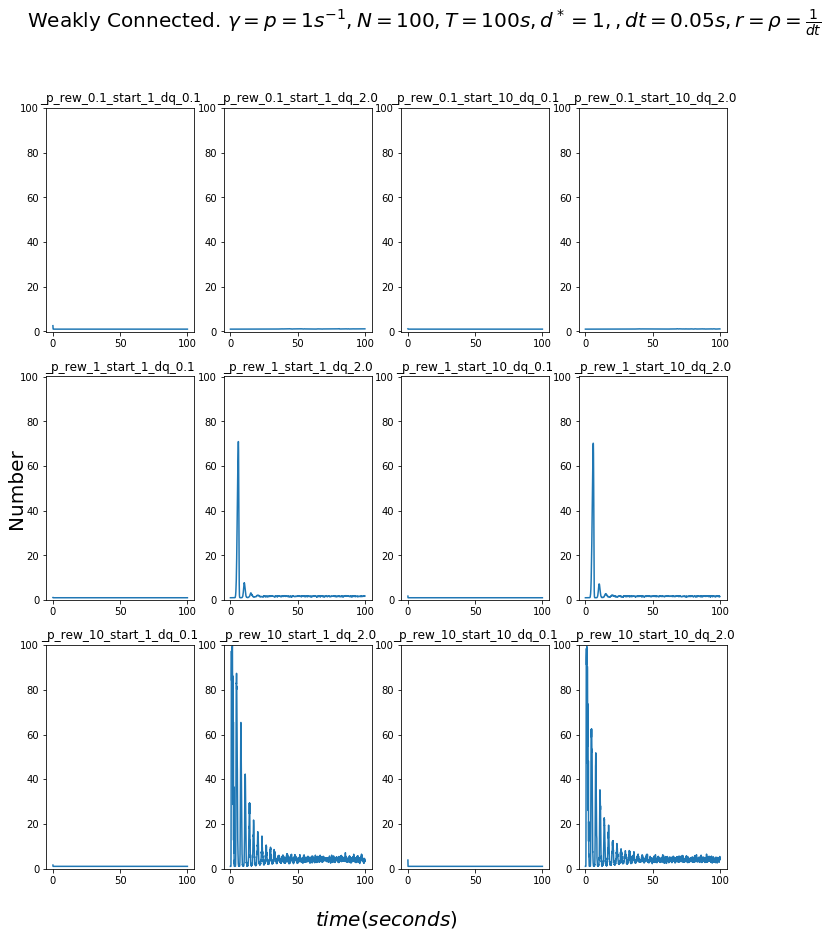

In [28]:
sampling_average_list_wc = []
file = 'weak_comps.h5'

x = np.arange(0,100,0.05)
y = np.arange(0,101,1)
X,Y = np.meshgrid(x,y)

p_rew_vals = [0,1,10]
start_vals = [1,10]
dose_quantity_vals = [1,20]

counter = 0
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(14,14))
a = 0
m = 0 #for the title
for row in ax:
    b = 0
    d = 0
    n = 0 #for the title
    for col in row:
        print(counter)
        if d == 2 :
            b = b + 1
            d = 0
        key_half = '_p_rew_'+str(p_rew_vals[a])+'_start_'+str(start_vals[b])+'_dq_'+str(dose_quantity_vals[d])
        key_half_title = '_p_rew_'+str(p_rew_vals[a])+'_start_'+str(start_vals[b])+'_dq_'+str(dose_quantity_vals[d]/10)
        if a == 0 :
            key_half_title = '_p_rew_0.1'+'_start_'+str(start_vals[b])+'_dq_'+str(dose_quantity_vals[d]/10)
        d = d + 1
        ax[m, n].set_title(key_half_title)
        ax[m, n].set_ylim([-0.1,100.1])
#         ax[m, n].set_ylim([-0.1,1.1])
        sampling_average = obtain_connected_comps_sampling_average(key_half,file)
        sampling_average_list_wc.append(sampling_average)
#         im = col.scatter(X,Y,c= sampling_average_list[counter],vmin=0, vmax=101)
        im = col.plot(x.flatten(),sampling_average.flatten(),linestyle = '-')
        counter = counter + 1
        n = n + 1
    a = a + 1
    m = m + 1

nax = fig.add_subplot(111, frame_on = False)
nax.set_xticks([])
nax.set_yticks([])
fig.suptitle(r'Weakly Connected. $\gamma=p=1s^{-1},N=100,T=100s,d^*=1,,dt=0.05s,r=\rho=\frac{1}{dt}$',fontsize = 20)
nax.set_xlabel(r'$time(seconds)$', fontsize = 20, labelpad=40)
nax.set_ylabel(r'Number', fontsize = 20, labelpad=20)
fig.subplots_adjust(right=0.8)

# cbar_ax = fig.add_axes([0.85, 0.15, 0.015, 0.7])
# fig.colorbar(im, cax=cbar_ax)

plt.savefig("weak_comps.svg", format="svg")

### Strong

0
1
2
3
4
5
6
7
8
9
10
11


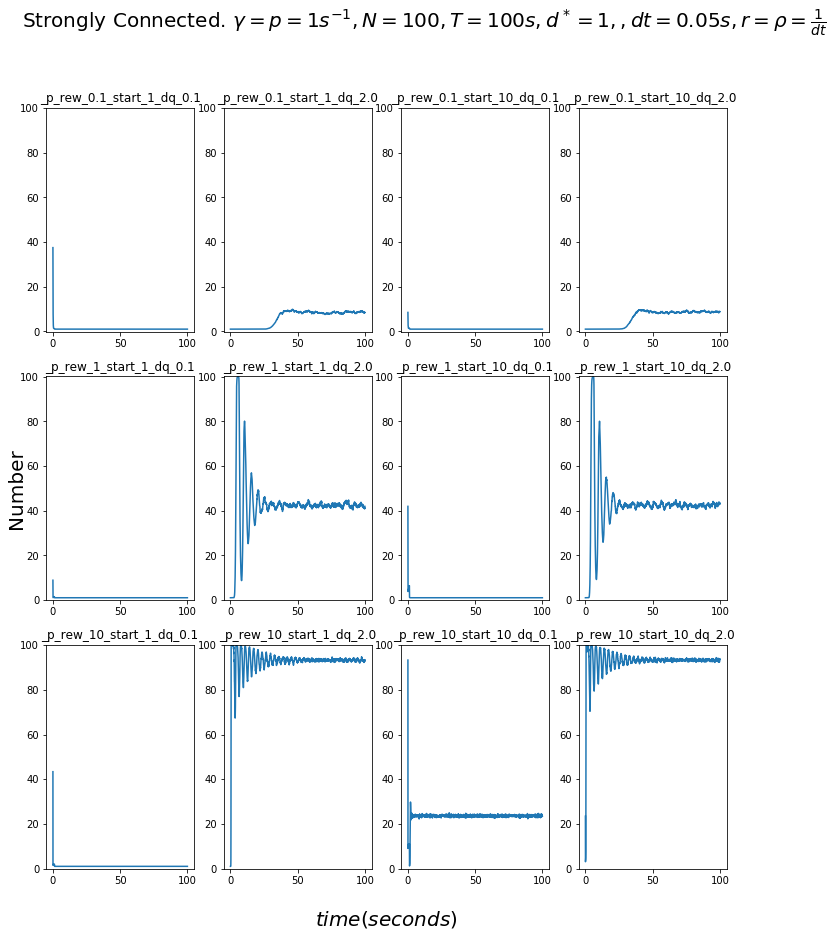

In [27]:
sampling_average_list_sc = []
file = 'strong_comps.h5'

x = np.arange(0,100,0.05)
y = np.arange(0,101,1)
X,Y = np.meshgrid(x,y)

p_rew_vals = [0,1,10]
start_vals = [1,10]
dose_quantity_vals = [1,20]

counter = 0
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(14,14))
a = 0
m = 0 #for the title
for row in ax:
    b = 0
    d = 0
    n = 0 #for the title
    for col in row:
        print(counter)
        if d == 2 :
            b = b + 1
            d = 0
        key_half = '_p_rew_'+str(p_rew_vals[a])+'_start_'+str(start_vals[b])+'_dq_'+str(dose_quantity_vals[d])
        key_half_title = '_p_rew_'+str(p_rew_vals[a])+'_start_'+str(start_vals[b])+'_dq_'+str(dose_quantity_vals[d]/10)
        if a == 0 :
            key_half_title = '_p_rew_0.1'+'_start_'+str(start_vals[b])+'_dq_'+str(dose_quantity_vals[d]/10)
        d = d + 1
        ax[m, n].set_title(key_half_title)
        ax[m, n].set_ylim([-0.1,100.1])
#         ax[m, n].set_ylim([-0.1,1.1])
        sampling_average = obtain_connected_comps_sampling_average(key_half,file)
        sampling_average_list_sc.append(sampling_average)
#         im = col.scatter(X,Y,c= sampling_average_list[counter],vmin=0, vmax=101)
        im = col.plot(x.flatten(),sampling_average.flatten(),linestyle = '-')
        counter = counter + 1
        n = n + 1
    a = a + 1
    m = m + 1

nax = fig.add_subplot(111, frame_on = False)
nax.set_xticks([])
nax.set_yticks([])
fig.suptitle(r'Strongly Connected. $\gamma=p=1s^{-1},N=100,T=100s,d^*=1,,dt=0.05s,r=\rho=\frac{1}{dt}$',fontsize = 20)
nax.set_xlabel(r'$time(seconds)$', fontsize = 20, labelpad=40)
nax.set_ylabel(r'Number', fontsize = 20, labelpad=20)
fig.subplots_adjust(right=0.8)

# cbar_ax = fig.add_axes([0.85, 0.15, 0.015, 0.7])
# fig.colorbar(im, cax=cbar_ax)

plt.savefig("strong_comps.svg", format="svg")

In [25]:
# print('sampling\n',sampling[100])
# print(np.shape(sampling[100]))
# print('count_out_degree\n',count_out_deg)
# print(np.shape(count_out_deg))
# print('sampling_average\n',sampling_average)
# print(np.shape(sampling_average))

In [26]:
# file = 'infec_frac.h5'
# df = pd.read_hdf(file,'sim_100_p_rew_0_start_10_dq_1')
# df.shape[1]
# np.shape(df.values)